### Kaggle competetion: Rice type classification
- Original dataset: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

**The tasks are to:**
- Explore the rice detail characteristics to build a supervised ML binary classifer for rice types
- Distinguish between Jasmine - 1, Gonen - 0 Rice using various models

**Potential ML Models:**
- Decision Trees & Random Forest
- Random Forest
- Logistic Regression
- KNN Classifier

**Outline**
- **Part-1: Data Overview**
    > check the #samples, #attributes <br>
    > attribute types <br>
    
- **Part-2: Data Preprocessing**
    > dropping unnecessary fields <br>
    > filling in missing values <br>
    > rearranging data <br>
    > normalize numerical data <br>

- **Part-3.1: Algorithm 1 (DT classifier & Random Forest)**


- **Part-3.2: Algorithm 2 (Logistic Regression)**


- **Part-3.3: Algorithm 3 (K-Nearest Neighbors)**


- **Part-4: Model Comparison and Conclusion**

### Imports

In [290]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn import tree

import graphviz 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import accuracy_score

# import warnings
# warnings.filterwarnings('ignore')

## **Part-1: Data overview**

### Load and explore the data

In [202]:
# get rice csv files as a pandas DataFrame
rice_data_df = pd.read_csv("riceClassification.csv")
# preview the top-5 rows of the data
rice_data_df.head(5)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [203]:
print('Shape: ', rice_data_df.shape)

Shape:  (18185, 12)


In [204]:
# attributes for each data sample
print('Columns: ', rice_data_df.columns)

Columns:  Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')


In [205]:
# Generate descriptive statistics of each numerical feature
rice_data_df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [206]:
# Analyze the columns to see the data types.(All numerical, no categorical)
rice_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [207]:
# Check if the Class type(rice types) are balanced
rice_data_df.Class.value_counts()

1    9985
0    8200
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

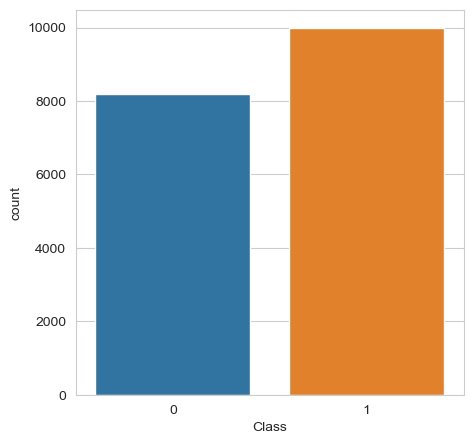

In [208]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=rice_data_df)

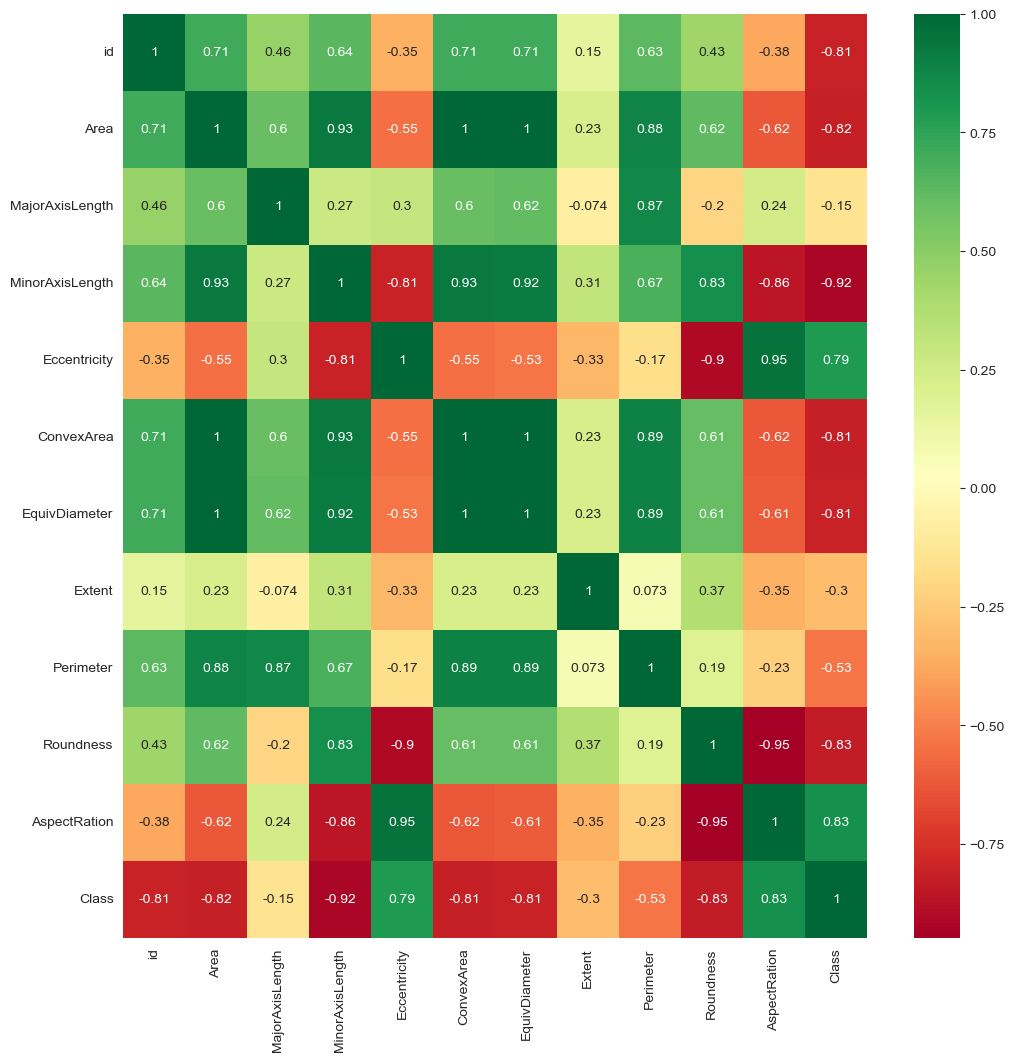

In [209]:
# Visualize the correlation matrix as a heatmap

_, ax = plt.subplots(figsize=(12,12))
columns = ['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea', 'EquivDiameter', 'Extent','Perimeter','Roundness','AspectRation','Class']
sns.heatmap(rice_data_df[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

## **Part-2: Data Preprocessing**

In this section, we focus on making the data ready to use for ML models. It includes:

- dropping unnecessary fields
- filling in missing values
- checking outliers
- rearranging data

### dropping unnecessary fields

In [210]:
# We drop the 'id' column because it isn't useful in the analysis or prediction.
# We also drop two of Area, ConvexArea or EquivDiameter because it has the almost the same correlation values across all predictors and target variables.
rice_data_df = rice_data_df.drop(['id', 'Area', 'ConvexArea'], axis=1)

### filling in missing values

In [211]:
# We can see there are no missing elements in the data dataframe. The data is clean and doesn't need to replace. 
rice_data_df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

### checking outliers

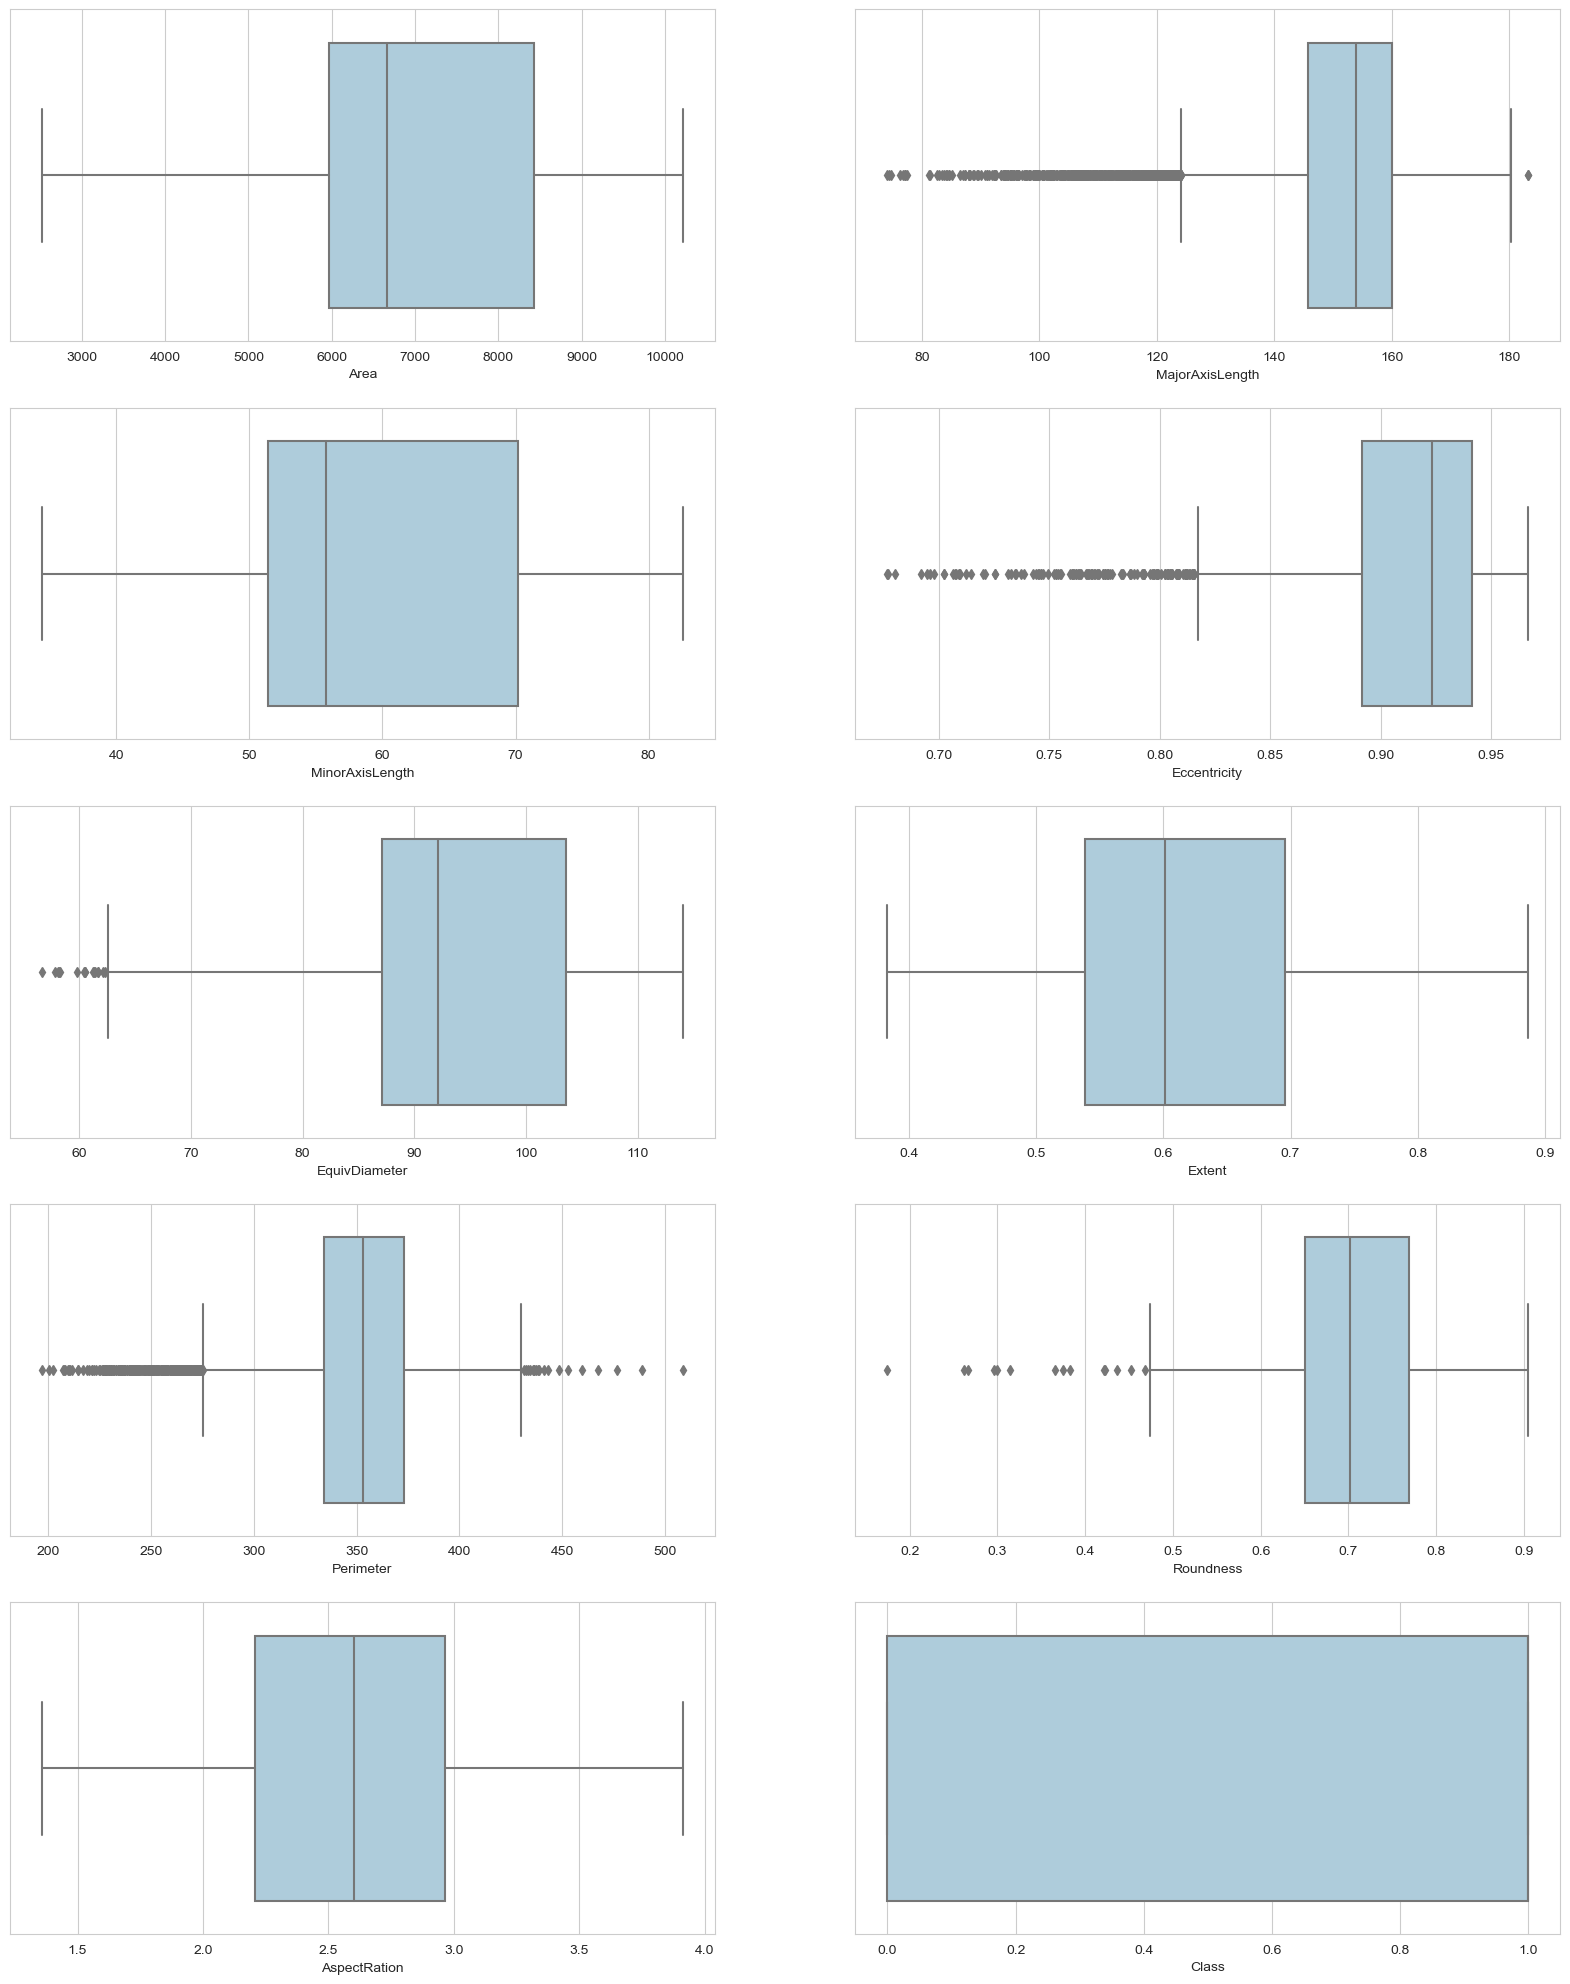

In [212]:
# draw box plot to check outliers
fig, axes = plt.subplots(5,2, figsize=(20,25))
i=0
for j in range(0,5):
    for k in range(0,2):
        sns.boxplot(ax=axes[j,k], data=rice_data_df, x=rice_data_df.columns[i], palette='Paired')
        i=i+1

Because there is no significant ourlier, we decide not to remove any sample.
However, since some variables take values between 0 and 1, while others take values greater than 1000. We would like to standarize features that take values greater than 1 without distorting the differences in the range of the values.

### Rearranging data by standarrization

In [213]:
scaler = MinMaxScaler(feature_range=(0,1))
trans_cols = ['MajorAxisLength', 'MinorAxisLength', 'EquivDiameter', 'Perimeter', 'AspectRation']

for col in trans_cols:
    rice_data_df[col] = scaler.fit_transform(rice_data_df[[col]].values)
  
rice_data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,0.165901,0.614922,0.719916,0.337191,0.657536,0.244209,0.764510,0.032371,1
1,2872,0.005123,0.352934,0.725553,0.066336,0.713009,0.036283,0.831658,0.037204,1
2,3048,0.019803,0.366292,0.731211,0.098164,0.759153,0.041724,0.868434,0.042222,1
3,3073,0.026591,0.363903,0.738639,0.102609,0.783529,0.043795,0.870203,0.049077,1
4,3693,0.100769,0.456247,0.749282,0.207586,0.769375,0.106958,0.874743,0.059471,1


## **Part-3.1: Algorithm 1 (DT classifier & Random Forest)**

### DT classifier

In [214]:
feature_cols = ["MajorAxisLength", "MinorAxisLength", "Eccentricity", 'EquivDiameter', "Extent", "Perimeter", "Roundness", "AspectRation"]
X = rice_data_df[feature_cols]
y = rice_data_df.Class

In [215]:
X.columns, y

(Index(['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'EquivDiameter',
        'Extent', 'Perimeter', 'Roundness', 'AspectRation'],
       dtype='object'),
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 18180    0
 18181    0
 18182    0
 18183    0
 18184    0
 Name: Class, Length: 18185, dtype: int64)

In [216]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.75, test_size=0.25) 

In [312]:
# Create Decision Tree classifer object
DT_clf=DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3, min_samples_split=10, min_samples_leaf=3)

# We use max_depth = 3, min_samples_split = 10 and min_samples_leaf = 3 in order to make the visualization easier 
# to read and to limit pre/post - pruning

# Train Decision Tree Classifer
DT_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_DTpred = DT_clf.predict(X_test)

SyntaxError: invalid syntax (1400519980.py, line 3)

In [218]:
#Score of the model
print("Accuracy:",np.round(metrics.accuracy_score(y_test, y_DTpred), decimals=4))

Accuracy: 0.9839


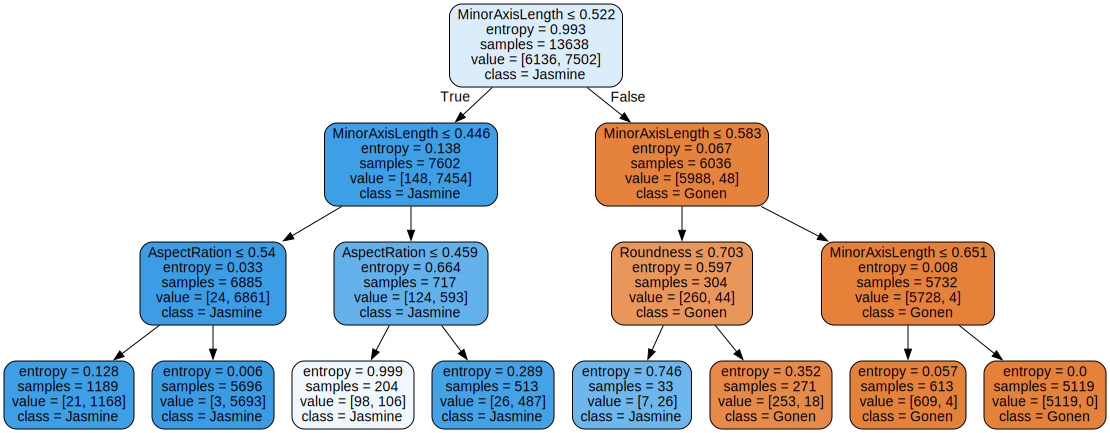

In [219]:
#Visualization
dot_data = tree.export_graphviz(DT_clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["Gonen", "Jasmine"],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("testgraph")
graph 

Looking at the graph above, "MinorAxisLength" is the most frequent and important detergent of classifing the rice type in DT model.
The model also use "AspectRation", "Eccentricity", and "Roundness" to classify the rice type.

### Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(random_state=0, criterion = 'entropy', max_depth=3, min_samples_split=10, min_samples_leaf=3)
RF_clf.fit(X_train, y_train)

#Predict the response for test dataset
y_RFpred = RF_clf.predict(X_test)

In [221]:
#Score of the model
print("Accuracy:",np.round(RF_clf.score(X_test, y_test), decimals=4))

Accuracy: 0.9879


In [222]:
#Visualization
dot_data_2 = tree.export_graphviz(RF_clf.estimators_[0], out_file=None,
                                  feature_names=X.columns,
                                  class_names=["Gonen", "Jasmine"],
                                  filled=True, rounded=True,  
                                  special_characters=True)  
graph_2 = graphviz.Source(dot_data_2)
graph_2.render("testgraph2")
graph_2

Error: Could not open "testgraph2.pdf" for writing : Permission denied


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'testgraph2']' returned non-zero exit status 1. [stderr: b'Error: Could not open "testgraph2.pdf" for writing : Permission denied\r\n']

In [229]:
# Set max_depth = 6 for more accuracy

from sklearn.ensemble import RandomForestClassifier
RF_clf_2 = RandomForestClassifier(random_state=0, criterion = 'entropy', max_depth=5, min_samples_split=10, min_samples_leaf=3)
RF_clf_2.fit(X_train, y_train)

#Predict the response for test dataset
y_RFpred_2 = RF_clf_2.predict(X_test)

In [230]:
#Score of the model
print("Accuracy:",np.round(RF_clf_2.score(X_test, y_test), decimals=4))

Accuracy: 0.9883


### Comparison of the accuracy of DT and RF

The accuracy scores of our random forest is higher than the score of our decision tree model (0.9879 > 0.9839).
This result represents that random forest made an improvement of robustness.

## **Part-3.2: Algorithm 2 (Logistic Regression)**

In [277]:
rice = pd.read_csv("riceClassification.csv")
rice = rice.drop(['id', 'Area', 'ConvexArea'], axis=1)

In [278]:
X = rice.drop(['Class'], axis=1)
y = rice['Class']

In [279]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

### Create a Logistic Regression for rice with L1 penalty

In [281]:
#add training data to the model
clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=100000)
clf.fit(X_train, y_train)

#predict the test data
y_pred = clf.predict(X_test)

In [282]:
#check the confusion matrix
confusion_matrix(y_test, y_pred)

array([[2016,   26],
       [  20, 2485]], dtype=int64)

In [283]:
#check the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2042
           1       0.99      0.99      0.99      2505

    accuracy                           0.99      4547
   macro avg       0.99      0.99      0.99      4547
weighted avg       0.99      0.99      0.99      4547



In [307]:
np.round(clf.score(X_test, y_test), decimals=4)

0.9899

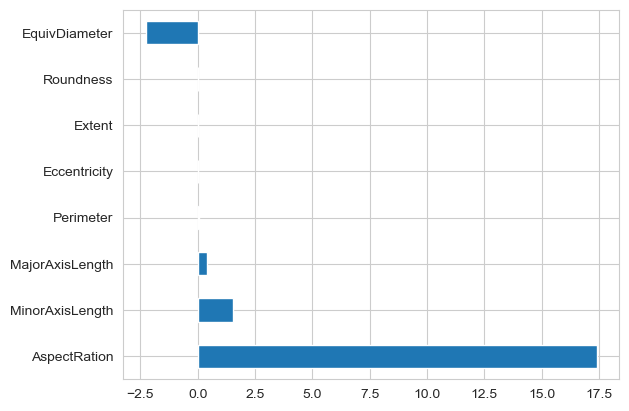

In [284]:
# check the top coef to see if the classifier is built with reasonable features
feat_importances = pd.Series(clf.coef_[0], index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [285]:
# let's see the intercept
clf.intercept_

array([0.1070743])

In [286]:
# let's see the classes
clf.classes_

array([0, 1], dtype=int64)

In [287]:
clf.n_features_in_

8

In [288]:
clf.n_iter_
# iterate times relate with the max_iter parameter

array([234], dtype=int32)

In [289]:
# predict class label
clf.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Create a Logistic Regression for rice with L2 penalty

In [299]:
#add training data to the model

clf_2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, max_iter=100000).fit(X_train, y_train)
#predict the test data
y_pred = clf_2.predict(X_test)
#check the accuracy
accuracy_score(y_test, y_pred)
#check the confusion matrix
confusion_matrix(y_test, y_pred)
#check the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2042
           1       0.99      0.99      0.99      2505

    accuracy                           0.99      4547
   macro avg       0.99      0.99      0.99      4547
weighted avg       0.99      0.99      0.99      4547



In [308]:
np.round(clf_2.score(X_test, y_test), decimals=4)

0.9894

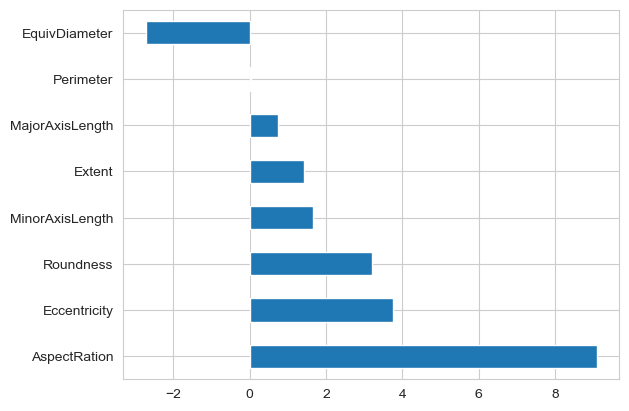

In [300]:
# check the top coef to see if the classifier is built with reasonable features
feat_importances = pd.Series(clf_2.coef_[0], index=X_resampled.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [301]:
clf_2.intercept_

array([4.31242359])

In [302]:
clf_2.classes_

array([0, 1], dtype=int64)

In [303]:
clf_2.n_features_in_

8

In [304]:
clf_2.n_iter_
# iterate times relate with the max_iter parameter

array([20], dtype=int32)

## **Part-3.3: Algorithm 3 (K Nearest Neighbors Classifier)**

In [111]:
feature_cols = ["MajorAxisLength", "MinorAxisLength", "Eccentricity","EquivDiameter", "Extent", "Perimeter", "Roundness", "AspectRation"]
X = rice_data_df[feature_cols]
y = rice_data_df.Class

In [55]:
Gonen = rice_data_df[rice_data_df.Class == 0]
Gonen

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
2490,6253,0.285599,0.895556,0.676647,0.567760,0.601945,0.324239,0.884759,0.000000,0
2502,5845,0.253452,0.841190,0.677024,0.516145,0.687647,0.282537,0.904131,0.000251,0
2599,5550,0.232751,0.801259,0.679858,0.477694,0.623596,0.262161,0.898050,0.002149,0
2600,5978,0.277860,0.851395,0.691993,0.533163,0.677778,0.326874,0.841207,0.010611,0
2701,5603,0.260342,0.817541,0.694531,0.484676,0.628844,0.303811,0.827758,0.012452,0
...,...,...,...,...,...,...,...,...,...,...
18180,5853,0.682917,0.345224,0.939210,0.517174,0.498594,0.436426,0.663444,0.608684,0
18181,7585,0.875159,0.492965,0.939398,0.725477,0.647461,0.605115,0.641362,0.610397,0
18182,6365,0.739322,0.384251,0.939760,0.581631,0.561287,0.466260,0.682832,0.613720,0
18183,5960,0.708342,0.354474,0.940427,0.530871,0.492399,0.469849,0.635227,0.619915,0


In [56]:
Jasmine = rice_data_df[rice_data_df.Class ==1]

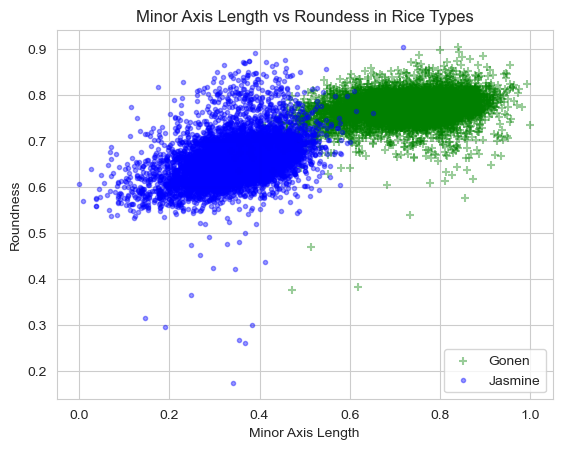

In [57]:
#Visualization:

#We graph the features MinorAxisLength vs Roundness to see the clusters of rice types. We use these two features 
#because they have the highest correlation with the the target Class variable. 

plt.xlabel("Minor Axis Length")
plt.ylabel("Roundness")
plt.title("Minor Axis Length vs Roundess in Rice Types")

plt.scatter(Gonen["MinorAxisLength"], Gonen["Roundness"], color = "green",alpha = 0.4, marker="+")
plt.scatter(Jasmine["MinorAxisLength"], Jasmine["Roundness"], color = "blue",alpha = 0.4, marker=".")
plt.legend(['Gonen', 'Jasmine'], loc ="lower right")

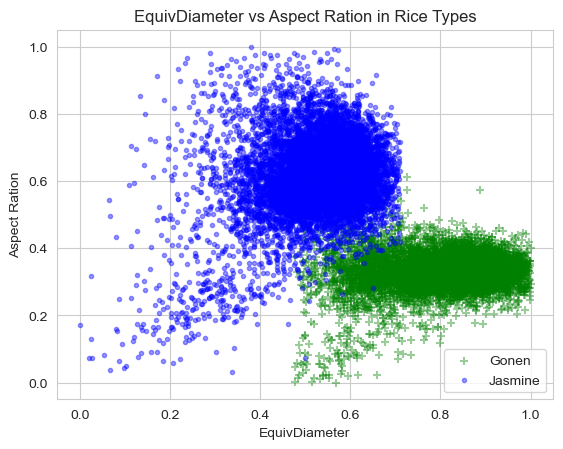

In [58]:
#Visualization:

#We graph the features EquivDiameter vs AspectRation to further see differentiation in the clusters of rice types. We use 
#these two features because they have also have a high correlation with the the target Class variable. 

plt.xlabel("EquivDiameter")
plt.ylabel("Aspect Ration")
plt.title("EquivDiameter vs Aspect Ration in Rice Types")

plt.scatter(Gonen["EquivDiameter"], Gonen["AspectRation"], color = "green",alpha = 0.4, marker="+")
plt.scatter(Jasmine["EquivDiameter"], Jasmine["AspectRation"], color = "blue",alpha = 0.4, marker=".")
plt.legend(['Gonen', 'Jasmine'], loc ="lower right")

In [59]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [60]:
len(X_train), len(X_test)

(13638, 4547)

In [91]:
#Create KNN classifier 
knn_5 = KNeighborsClassifier() #We will try different K-values, but for now we will use the k = 5

In [92]:
#Train KNN classifier
knn_5.fit(X_train, y_train)

KNeighborsClassifier()

In [93]:
##Score of the model K = 5
print("Accuracy:",np.round(knn_5.score(X_test, y_test), decimals=4))

Accuracy: 0.9868


In [94]:
#For K = 3
#Creating KNN classifier
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [95]:
#Train KNN classifier
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [96]:
#Score of the model K = 3
print("Accuracy:",np.round(knn_3.score(X_test, y_test), decimals=4))

Accuracy: 0.9861


In [243]:
#For K = 9:
#Creating KNN classifier
knn_9 = KNeighborsClassifier(n_neighbors=9)

In [244]:
#Train KNN classifier
knn_9.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [245]:
#Score of the model K =9
print("Accuracy:",np.round(knn_9.score(X_test, y_test), decimals=4))

Accuracy: 0.9868


In [246]:
#For K = 15:
#Creating KNN classifier
knn_15 = KNeighborsClassifier(n_neighbors=15)

In [247]:
#Train KNN classifier
knn_15.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [248]:
#Score of the model K =15
print("Accuracy:",np.round(knn_15.score(X_test, y_test), decimals=4))

Accuracy: 0.9866


## **Part-4: Model Comparison and Conclusion**

### Model Explaination and Evaluation 

- We use the default 75% training and 25% test. We trained models with all the feature variables minus 'id', 'Area' and 'EquivDiameter' and the target 'Class' variable.

- Using the score function, we can check the accuracy of each model. 
- For the decision tree, it scored 0.9839
- For the random forest, it scored 0.9879
- For the logistic regression, it scored 0.9899 and 0.9894.
- For the knn classifer at K = 3, 5, 9, 15 the corresponding accuracy scores are: 0.9861, 0.9868, 0.9868, and 0.9866. 
- For every value of K, the knn classifier model does not perform better than the random forest. In addition at there seems to be a negative correlation between k and accuracy score with the knn classifer model.

- In conclusion, logistic regression is more accurate and faster than the other classifier models for the binary classification of the rice data types. (It is faster because knn classifer has to scan the whole dataset to make predictions, while decision trees do not.)


### Error Analysis

Text(60.222222222222214, 0.5, 'Truth')

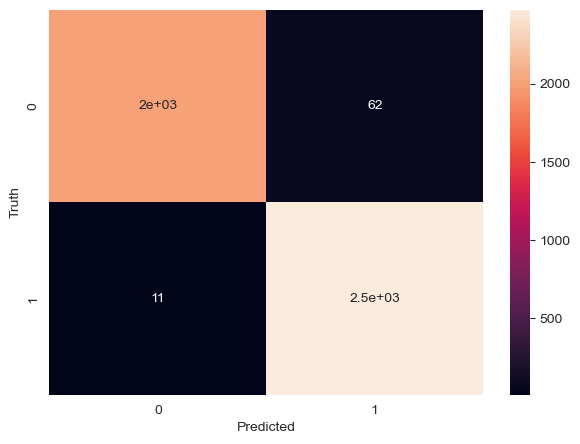

In [87]:
# Confusion Matrix of Decision Trees

cm = confusion_matrix(y_test, y_DTpred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

From the confusion matrix above, the decision tree predicts Gonen 26 times when it actually is Jasmine and Jasmine 33 times when it really is Gonen. These errors are possible due to the when Jasmine and Gonen rice types have many similar intersecting feature variables(Shown in the MinorAxisLength vs Roundness and Area vs AspectRation) and it is hard to create pure nodes that entirely seperate the two rice types.(Generates close to pure but still inperfect nodes)

Text(60.222222222222214, 0.5, 'Truth')

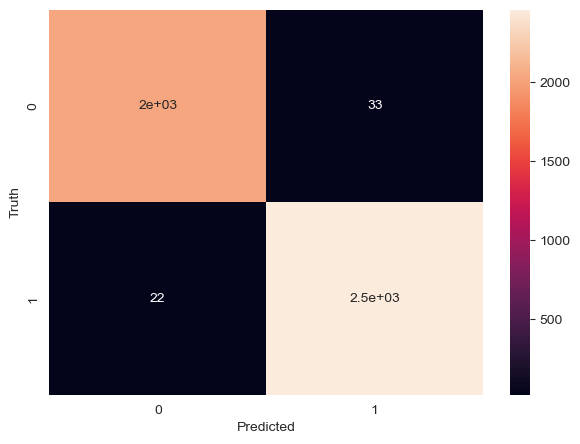

In [110]:
# Confusion Matrix of Random Forest

y_pred = RF_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(60.222222222222214, 0.5, 'Truth')

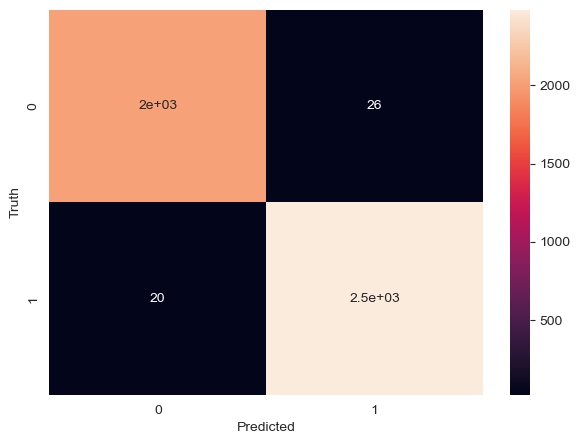

In [309]:
# Confusion Matrix of Logistic Regression with L1

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(60.222222222222214, 0.5, 'Truth')

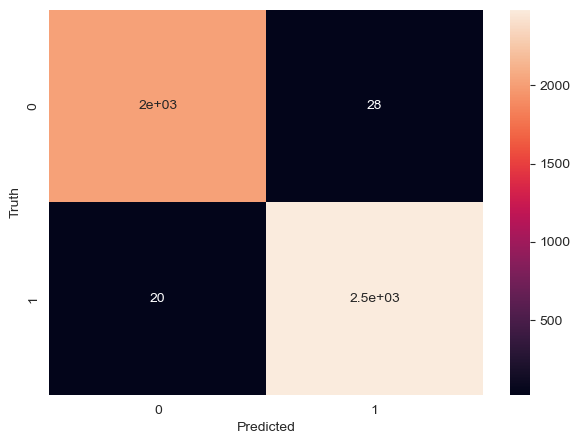

In [310]:
# Confusion Matrix of Logistic Regression with L2

y_pred = clf_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(60.222222222222214, 0.5, 'Truth')

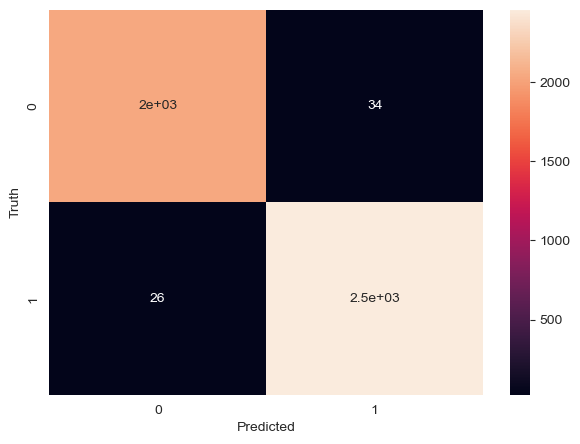

In [100]:
# Confusion Matrix of Knn Classifier(default)

y_pred = knn_5.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(60.222222222222214, 0.5, 'Truth')

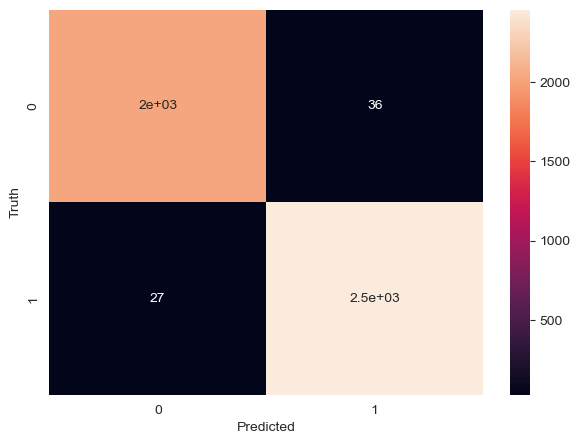

In [101]:
# Confusion Matrix of Knn Classifier(K = 3)

y_pred = knn_3.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(60.222222222222214, 0.5, 'Truth')

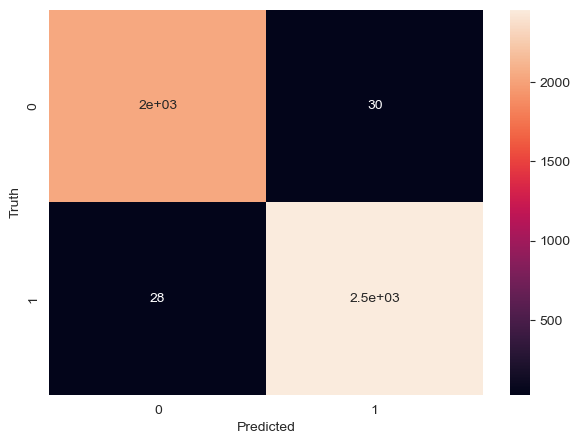

In [102]:
# Confusion Matrix of Knn Classifier(K = 9)

y_pred = knn_9.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(60.222222222222214, 0.5, 'Truth')

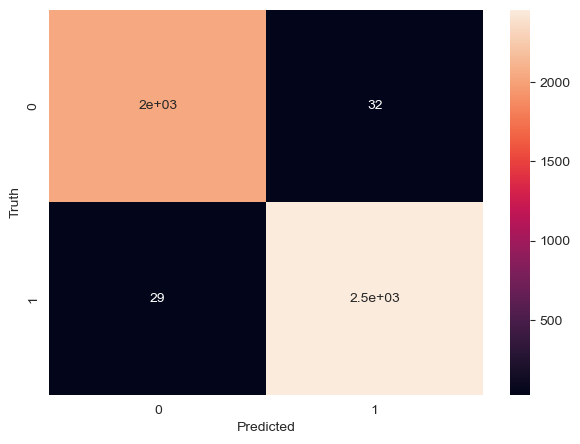

In [249]:
# Confusion Matrix of Knn Classifier(K = 15)

y_pred = knn_15.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

It is very difficult to set a suitable K for a given training dataset. The errors of the Knn classifer are largely due to the fact that it considers the entire set of n points for every execution, as a result at certain K levels, errors can be made because of some points outside its known cluster/outliers which lead to faulty predictions. 

From the confusion matrixes above, the Knn classifiers in total make more errors than the Random Forest and the Logistic REgression. This makes sense because the random forest model is more accurate than the Knn classifer models. The Knn classifer models make 63, 60, 58 and 61 errors for K values of 3, 5, 9, and 15 respectively. The decision tree made 73 errors, and the Random forest made 55 errors in comparison. Also, the Logistic Regression with L1 and L2 made 46 errors and 48 errors. Therefore, Logistic Regression scored the best as far as on the model we set up.

## Conclusion

- We can use either the Decision Tree, the Random Forest, Logistic Regression and Knn Classifer models to build a binary classifer for rice types. Any model is at least 98% accurate in predicting the correct rice class. 
- At least in our setting, Logistic Regression with L1 is the best model based on the score and the total number of dalse-positive and false negative 
- Random forest is the better model for the classifer regardless of the K-value of the Knn Classifer.(A small value of k could lead to overfitting as well as a big value of k can lead to underfitting, but it doesn't matter in this case in comparison to the Random forest.)(Plus, Knn is a lazy alogrithm while, Random forest is an eager learner)
- Random Forest and Logistic Regression are more important models for human understanding because they tell us which features are more important for classification.